<a href="https://colab.research.google.com/github/hnidey13/Assignment-Getting-and-Cleaning-Data-Course-Project/blob/master/Bayesian_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando un Modelo Estadístico con la versátil Distribución Beta**

## Introducción

<p style="text-align:justify;">
Hoy quiero compartir un poco sobre un tema que me parece fascinante en el campo de la Ciencia de Datos, en específico, en Estadística Bayesiana.
En este Post exploraremos la Distribución Beta como función de densidad a priori para un modelo Bayesiano, ofreciendo una combinación única entre teoría y práctica para comprender mejor este concepto fundamental en el análisis Estadístico.
</p>


## Planteamiento de la pregunta

<p style="text-align:justify;">
La idea de escribir este Post surgió cuando leí una publicación en la que el autor se planteaba una pregunta intrigante sobre qué tipo de experimento con observaciones binarias podría ser modelado con una distribución beta con parámetros $a=b=0.1$ como función a priori, esta función de densidad tiene la siguiente forma:
</p>

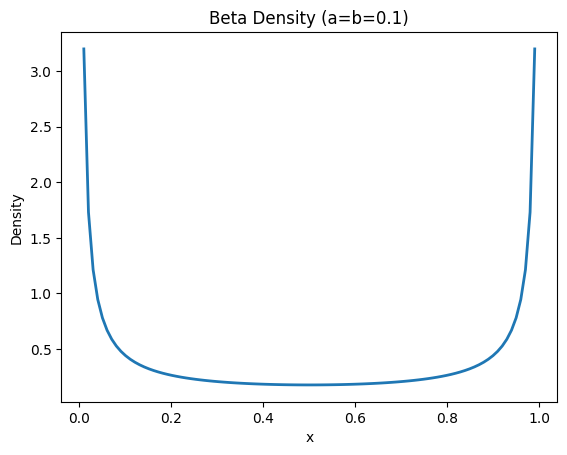

In [ ]:
#Import libraries
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters of the beta distribution
a, b = .1,.1

# Generate the x-axis values
x_axis = np.linspace(0, 1, 100)

# Calculate the beta density function
y_axis = ss.beta.pdf(x_axis, a, b)

# Create the plot
plt.plot(x_axis, y_axis, linewidth=2)

# Set the title and axis labels
plt.title('Beta Density (a=b=0.1)')
plt.xlabel('x')
plt.ylabel('Density')

# Show the plot
plt.show()

Podríamos llamarle a esta función de densidad la “función Batman”, por la evidente similitud con unos cuernos.

Si se te ocurre algún ejemplo práctico para responder a esta pregunta podrías dejarlo en los comentarios.


## Desarrollo teórico

**Distribución Beta**

Para dar una respuesta a esta pregunta, primero recordemos que una variable aleatoria $Y$ con distribución beta tiene una función de densidad dada por:

$$ f(y;a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}y^{a-1}(1-y)^{b - 1},$$ para $0\leq y\leq 1$, $b>0$ y $a>0$, donde $\Gamma$ es la función gamma.

**Distribución Bernoulli**

La función de densidad de una variable aleatoria $X$ con distribución Bernoulli está dado por:

$$f(x;\theta)=\theta^x(1-\theta)^{1-x},$$

para $x\in\{0,1\}$ y $0\leq\theta\leq 1.$


---

**Modelo Bayesiano**

Ahora, sean $X_1,\dots,X_n$ una muestra aleatoria con función de densidad $f(x\mid\theta)$.

Para una muestra observada $\textbf{x}=x_1,\dots,x_n$, en el contexto de Estadística Bayesiana, la *función de densidad a posteriori* del parámetro $\theta$ está dada por:

$$p\left(\theta\mid \textbf{x}\right)=\frac{p\left(\textbf{x}\mid \theta\right)p\left(\theta\right)}{\displaystyle\int\limits_{\Theta}{p\left(\textbf{x}\mid \widetilde{\theta}\right)p\left(\widetilde{\theta}\right)d\widetilde{\theta}}},$$

donde $\Theta$ representa al espacio parámetrico, $p(\theta)$ es la **función a priori** y $p\left(\textbf{x}\mid \theta\right)$ es la función de verosimilitud. Esto es, por el supuesto de independencia tenemos:

$$p\left(\textbf{x}\mid \theta\right)=\mathcal{L}\left(\theta;\textbf{x}\right)=\prod_{i=1}^nf\left(x_i\mid \theta\right).$$

## Ejemplificación y simulaciones

La pregunta en cuestión nos dirige al siguiente planteamiento:

Sea $X_1,\dots,X_n$ una muestra aleatoria con $X_i\sim\textit{Bernoulli}(\theta)$ y definimos a la función a priori de modo que $\theta\sim Beta(a,b)$.

Además, al calcular la función de densidad a posteriori es fácil ver que $\theta\mid \textbf{x}\sim Beta\left(a+\sum_{i=1}^n x_i,b+n-\sum_{i=1}^n x_i\right).$

En el siguiente código se muestra un ejemplo para este modelo, para lo cual realizamos los siguiente pasos:
1. Simulamos un valor de $\theta$ a partir de una distribución $Beta(0.1,0.1)$
2. Simulamos 100 observaciones Bernoulli con el parámetro obtenido en paso anterior
3. Graficamos la densidad a posteriori de $\theta\mid\textbf{x}$ y marcamos el valor simulado de $\theta$

Real value of θ: [0.92559555]
Simulated data: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


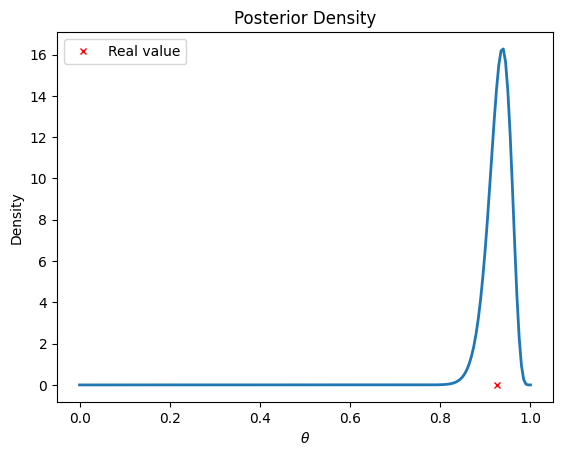

In [ ]:
#Simulate 1 value from a beta distribution with parameters 0.1 and 0.1
np.random.seed(seed=18)
a, b = .1,.1
p = ss.beta.rvs(a, b, size=1)

print('Real value of \u03B8:',p)

# Simulating 100 values from
n = 100
x = ss.bernoulli.rvs(p, size = n)
print('Simulated data:', x)

# Calculate the posteriori density function
x_axis = np.linspace(0, 1, 200)
y_axis = ss.beta.pdf(x_axis, a+sum(x), b+n-sum(x))

# Create the plot
plt.plot(x_axis, y_axis, linewidth=2)

# Set the title and axis labels
plt.title('Posterior Density')
plt.xlabel(r"$\theta$")
plt.ylabel('Density')
plt.plot(p, 0, 'x', ms=5, color = 'red', label='Real value')
plt.legend()

# Show the plot
plt.show()

En este caso, al simular un valor de la distribución $Beta$ con parámetros $a=b=0.1$ obtuvimos $0.92559555$ y, como es de esperarse, la función a posteriori parece modelar correctamente dicho valor.

Al correr el código anterior varias veces podemos ver que este comportamiento se repite para cualquier valor simulado de $\theta$ y para cualesquiera observaciones:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, IntSlider, FloatSlider, Button, fixed,  Button, Layout, jslink, IntText, IntSlider, AppLayout, Button, Layout
from IPython.display import clear_output

def plot_post(n,a,b):
    """
    Function to plot the prior and posterior densities.

    Parameters:
    - n: Number of observations
    - a, b: Parameters of the prior Beta distribution
    """
    # Generar 'n' observaciones aleatorias de una distribución normal estándar
    p = ss.beta.rvs(a, b, size=1)

    print('Real value of \u03B8:',p)


    # Calcular la densidad a priori
    prior_x = np.linspace(0, 1, 1000)
    prior_y = ss.beta.pdf(prior_x, a, b)

    # Simulating 100 values from
    x = ss.bernoulli.rvs(p, size = n)

    #
    zero_count = np.sum(x == 0)
    one_count = n - zero_count
    print('Number of zeros:', zero_count, '\nNumber of ones:', one_count)

    # Calculate the posteriori density function
    x_axis = np.linspace(0, 1, 200)
    y_axis = ss.beta.pdf(x_axis, a+sum(x), b+n-sum(x))

    # Create the plot
    plt.plot(prior_x, prior_y, label='Prior Density', color='green', linestyle='--')
    plt.plot(x_axis, y_axis, label = 'Posterior Density', color='blue')


    # Set the title and axis labels
    plt.title('Posterior Density')
    plt.xlabel(r"$\theta$")
    plt.ylabel('Density')
    plt.plot(p, 0, 'x', ms=5, color = 'red', label='Real value')
    plt.legend()

    # Show the plot
    plt.show()


# Define the interactive sliders
n_slider = IntSlider(min=10, max=100, step=10, value=20)
a_slider = FloatSlider(min=0.1, max=10, step=0.1, value=.1)
b_slider = FloatSlider(min=0.1, max=10, step=0.1, value=.1)

# Create the interactive plot
im = interact_manual(plot_post, n=n_slider, a=a_slider, b=b_slider)
im.widget.children[3].description = 'Update Plot'



def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')



AppLayout(header=None,
          left_sidebar=n_slider,
          center=center_button,
          right_sidebar=None,
          footer=None)



interactive(children=(IntSlider(value=20, description='n', min=10, step=10), FloatSlider(value=0.1, descriptio…

AppLayout(children=(IntSlider(value=20, description='n', layout=Layout(grid_area='left-sidebar'), min=10, step…

Es crucial notar que para este modelo la distribución Beta modela el parámetro de la distribución Bernoulli y no los resultados binarios directamente.

Adicionalmente, podemos observar que la disitribución Beta con parámetros $a=b=0.1$ no necesariamente implica que las observaciones serán todas iguales a 0 o todas iguales a 1. En otras palabras, al simular valores de la distribución Beta propuesta es poco probable obtener exactamente el valor 0 o el valor 1. Sin embargo, dada la forma de la densidad Beta, sí esperamos obtener valores que se encuentren con una fuerte tendencia a estar cerca del 0 o cerca del 1.

## Respuesta a la pregunta

Respondiendo a la pregunta original, un experimento sencillo que podría ser modelado con el desarrollo anterior sería el siguiente: imaginemos una bolsa que contiene una mezcla de monedas, donde la mitad de ellas están sesgadas hacia el cero y la otra mitad hacia el uno. Al seleccionar una moneda al azar de esta bolsa y lanzarla, observaremos el resultado para determinar si cae cara (1) o cruz (0).

En realidad, cualquier experimento con resultados binarios, del cual tengamos indicios para pensar que el parámetro está sesgado hacia algún extremo podría ser descrito utilizando este modelo. Otros ejemplos incluyen:

*   **Prueba de calidad de productos:** Se determina si un producto es aceptable o no. A priori, sabemos que hay dos tipos de materiales involucrados: uno con una baja probabilidad de pasar la prueba y otro con una alta probabilidad de pasarla. Al realizar la prueba en un producto seleccionado al azar, observamos el resultado para determinar si cumple o no con los estándares de calidad establecidos.

*   **Suceptibilidad a la compra:** La población objetivo se divide en dos grupos: uno con una tendencia a comprar después de ver la publicidad y otro con una tendencia a no dejarse influenciar por la publicidad. Al evaluar la respuesta de una persona seleccionada al azar ante la publicidad, observamos si realiza la compra o no.

Estos ejemplos ilustran cómo el modelo puede aplicarse a situaciones del mundo real con resultados binarios, ofreciendo una manera poderosa de entender y analizar datos en diversas áreas.

## Modificando los parámetros de la distribución Beta

In a situation where we know a priori that the observations has a tendency towards one side, let's say, towards 0, it would be reasonable to use a beta prior density with different parameters, lets say α=0.1 and β=5. The density of this function is shown in the image.

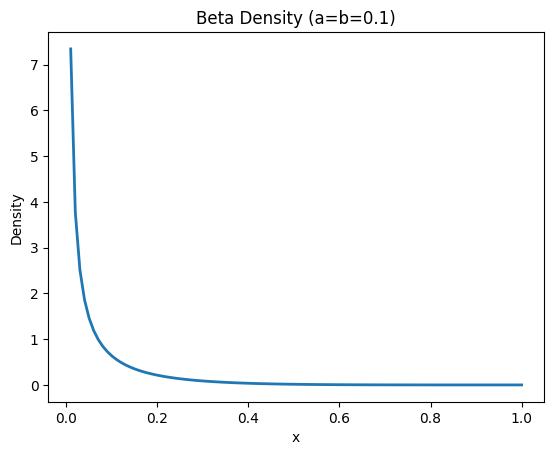

In [ ]:
# Define the parameters of the beta distribution
a, b = .1,5

# Generate the x-axis values
x_axis = np.linspace(0, 1, 100)

# Calculate the beta density function
y_axis = ss.beta.pdf(x_axis, a, b)

# Create the plot
plt.plot(x_axis, y_axis, linewidth=2)

# Set the title and axis labels
plt.title('Beta Density (a=b=0.1)')
plt.xlabel('x')
plt.ylabel('Density')

# Show the plot
plt.show()